In [33]:
import matplotlib.pyplot as plt

In [34]:
from scipy.signal import spectrogram

In [35]:
import numpy as np

In [36]:
import pickle, glob

In [37]:
import sys,os

In [38]:
from scipy.fftpack import fft

In [39]:
Path_FieldTrip = "/buffer_bci-master/dataAcq/buffer/python"
sys.path.append(os.getcwd() + Path_FieldTrip)

import FieldTrip

In [40]:
Path_Preproc = "/buffer_bci-master/python/signalproc"
sys.path.append(os.getcwd() + Path_Preproc)


import preproc

In [41]:
ch = '''  1) Matched : FP1	 ->	 FP1
  2) Matched : FPz	 ->	 FPz
  3) Matched : FP2	 ->	 FP2
  4) Matched : AF7	 ->	 AF7
  5) Matched : AFz	 ->	 AFz
  6) Matched : AF8	 ->	 AF8
  7) Matched : F3	 ->	 F3
  8) Matched : Fz	 ->	 Fz
  9) Matched : F4	 ->	 F4
 10) Matched : FC5	 ->	 FC5
 11) Matched : FC1	 ->	 FC1
 12) Matched : FC2	 ->	 FC2
 13) Matched : FC6	 ->	 FC6
 14) Matched : T9	 ->	 T9
 15) Matched : C3	 ->	 C3
 16) Matched : Cz	 ->	 Cz
 17) Matched : C4	 ->	 C4
 18) Matched : T10	 ->	 T10
 19) Matched : CP1	 ->	 CP1
 20) Matched : CP2	 ->	 CP2
 21) Matched : P3	 ->	 P3
 22) Matched : Pz	 ->	 Pz
 23) Matched : P4	 ->	 P4
 24) Matched : TP9	 ->	 TP9
 25) Matched : P7	 ->	 P7
 26) Matched : POz	 ->	 POz
 27) Matched : O1	 ->	 O1
 28) Matched : Oz	 ->	 Oz
 29) Matched : O2	 ->	 O2
 30) Matched : TP10	 ->	 TP10'''

In [42]:
ch_32 = {}
for i in ch.split('\n'):
    #print(i.split(')')[0].replace(' ',''))
    #print(i.split('->')[-1].replace('	 ',''))
    ch_32[str(i.split(')')[0].replace(' ',''))] = str(i.split('->')[-1].replace('	 ',''))
ch_32['1']

'FP1'

In [43]:
ch_32_r = {}
for i in ch.split('\n'):
    #print(i.split(')')[0].replace(' ',''))
    #print(i.split('->')[-1].replace('	 ',''))
    ch_32_r[str(i.split('->')[-1].replace('	 ',''))] = str(i.split(')')[0].replace(' ',''))

Processin the data form the file 4 up to 15

In [44]:
 # 0 - left, 1 -right, 2 - both

values_hands = {'0':'left', '1':'right', '2':'both' }

In [45]:
exp = [0,0,0,0]
for i in range(4,16):
    file = 'data/training_data_imagined_movement-'
    print(i, file+str(i)+'.pk')
    f = open(file+str(i)+'.pk', 'rb')
    exp.append(pickle.load(f))

4 data/training_data_imagined_movement-4.pk
5 data/training_data_imagined_movement-5.pk
6 data/training_data_imagined_movement-6.pk
7 data/training_data_imagined_movement-7.pk
8 data/training_data_imagined_movement-8.pk
9 data/training_data_imagined_movement-9.pk
10 data/training_data_imagined_movement-10.pk
11 data/training_data_imagined_movement-11.pk
12 data/training_data_imagined_movement-12.pk
13 data/training_data_imagined_movement-13.pk
14 data/training_data_imagined_movement-14.pk
15 data/training_data_imagined_movement-15.pk


In [46]:
left_hand_mov = []
right_hand_mov = []
both_hands_mov = []



#Counters

right = 0
left = 0
both = 0


for n_exp in range(4,16):
    print(' ***********   Experiment  '+str(n_exp)+'   *********** ')
    data           =   np.array(exp[n_exp]['data'])   #data support variable
    data           =   np.transpose(data)
    data           =   preproc.detrend(data)
    data           =   preproc.spatialfilter(data, type = 'spatialfilter')
    data, freqs    =   preproc.powerspectrum(data,dim = 1,fSample=exp[i]['hdr'].fSample)
    
    #data,freqIdx  =   preproc.selectbands(data,dim=1,band=freqbands,bins=freqs)  #Check out later
    
    
    print(data.shape)
    
    n_events = data.shape[2]
    for event in range(n_events):
        
        print(exp[n_exp]['events'][event].value[0])
        
        if exp[n_exp]['events'][event].value[0] == 0:
            print('left')
            left = left + 1
            left_hand_mov.append(data[:,:,event])
        
        
        if exp[n_exp]['events'][event].value[0] == 1:
            print('right')
            right = right +1
            right_hand_mov.append(data[:,:,event])
        
            
        if exp[n_exp]['events'][event].value[0] == 2:
            print('both')
            both = both + 1
            both_hands_mov.append(data[:,:,event])
           

left_hand_mov    =   np.array(left_hand_mov)
right_hand_mov   =   np.array(right_hand_mov)
both_hands_mov   =   np.array(both_hands_mov)

 ***********   Experiment  4   *********** 
(37, 375, 21)
2
both
1
right
2
both
1
right
1
right
0
left
1
right
1
right
0
left
0
left
1
right
0
left
2
both
2
both
0
left
2
both
1
right
0
left
0
left
2
both
2
both
 ***********   Experiment  5   *********** 
(37, 375, 21)
1
right
1
right
2
both
0
left
1
right
2
both
2
both
0
left
2
both
2
both
0
left
1
right
0
left
1
right
1
right
2
both
0
left
0
left
0
left
2
both
1
right
 ***********   Experiment  6   *********** 
(37, 375, 21)
1
right
0
left
2
both
2
both
1
right
0
left
1
right
2
both
0
left
2
both
0
left
1
right
1
right
2
both
2
both
2
both
0
left
0
left
1
right
0
left
1
right
 ***********   Experiment  7   *********** 
(37, 375, 21)
2
both
1
right
1
right
1
right
0
left
0
left
1
right
1
right
2
both
2
both
2
both
2
both
2
both
0
left
1
right
0
left
1
right
0
left
0
left
2
both
0
left
 ***********   Experiment  8   *********** 
(37, 375, 21)
2
both
1
right
1
right
2
both
2
both
2
both
0
left
1
right
1
right
0
left
0
left
1
right
2
bot

In [47]:
both

84

---- 

preproc examples (check out later the select band thing) 

In [48]:
data_14 = np.array(exp[14]['data'])

In [49]:
data_14 = np.transpose(data_14)

In [50]:
data_14 = preproc.detrend(data_14)

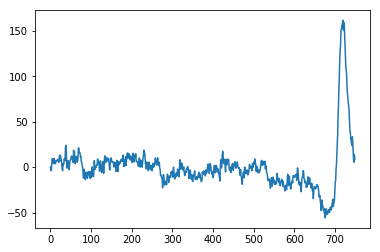

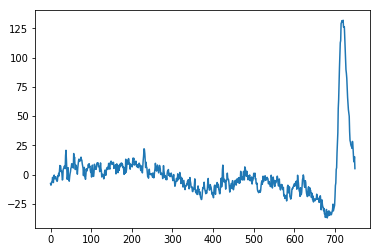

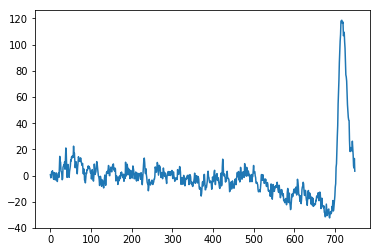

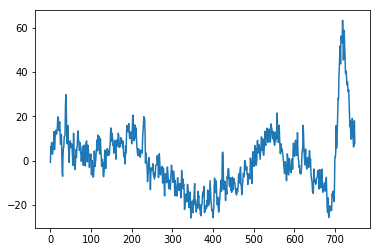

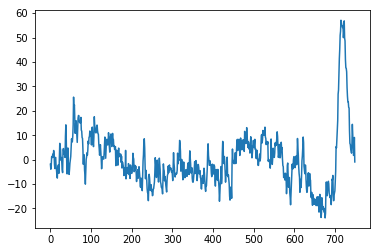

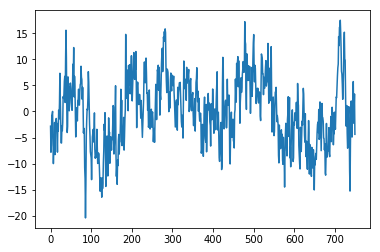

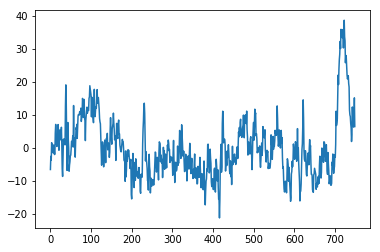

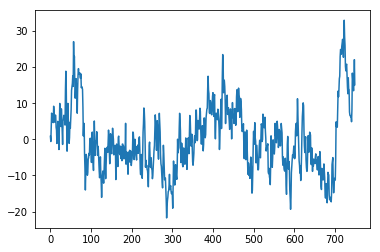

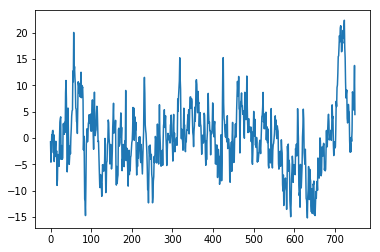

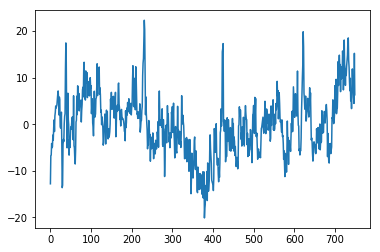

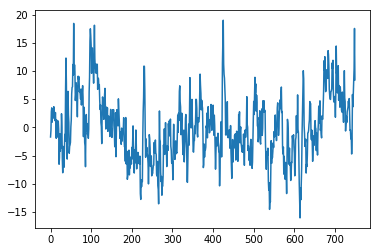

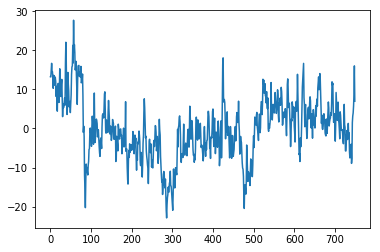

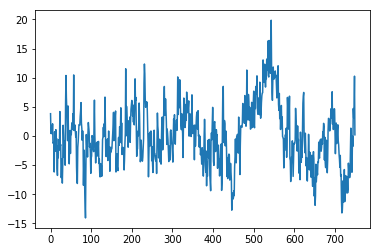

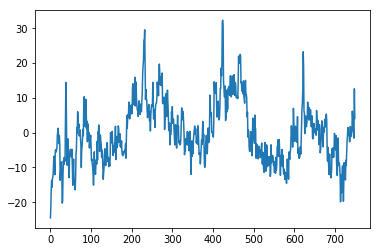

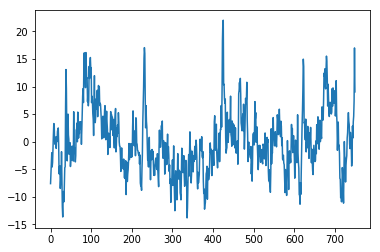

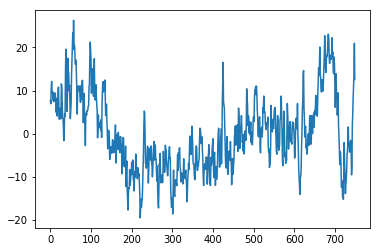

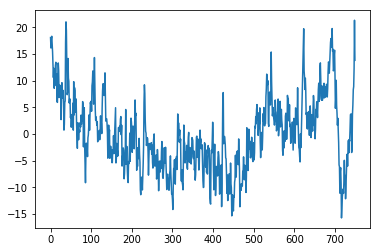

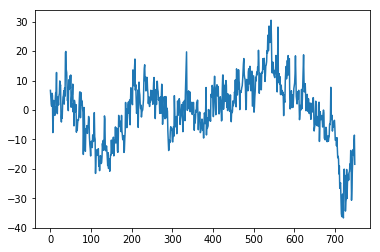

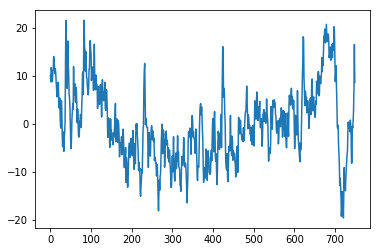

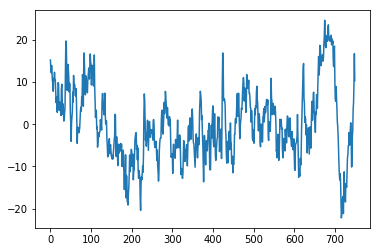

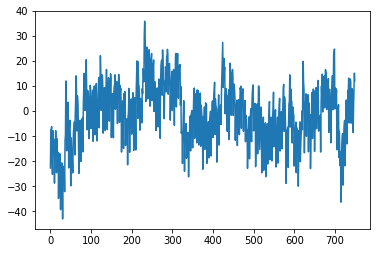

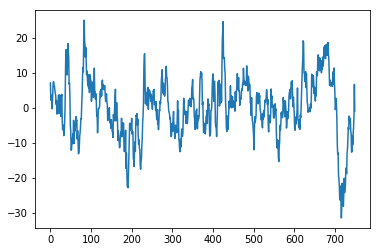

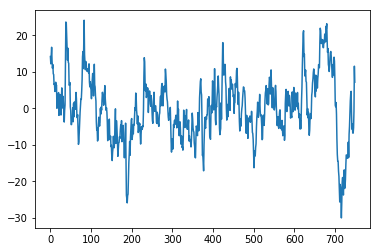

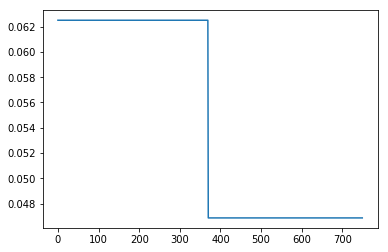

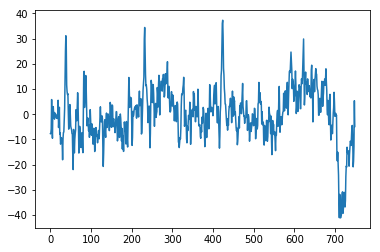

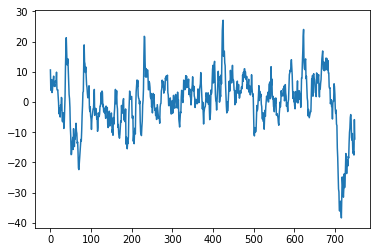

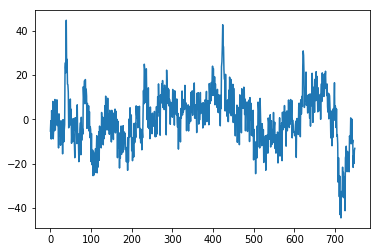

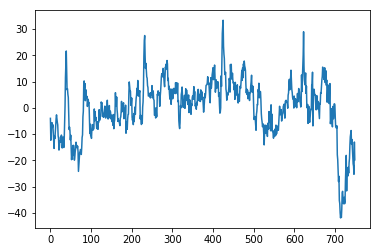

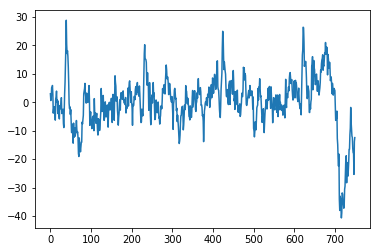

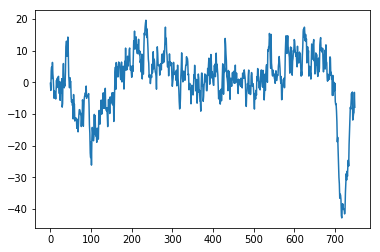

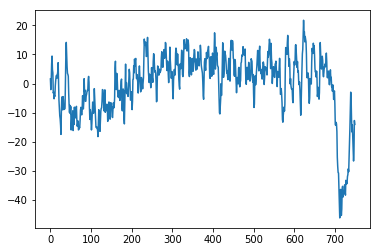

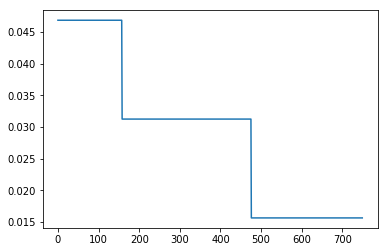

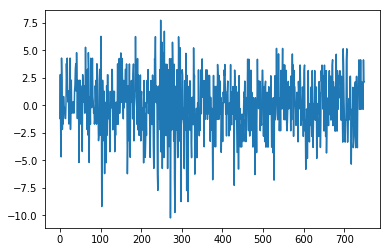

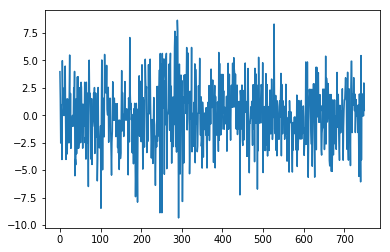

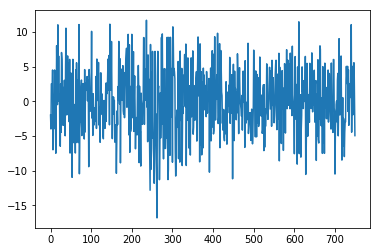

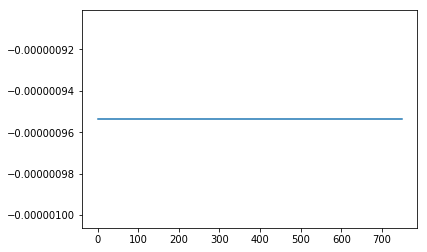

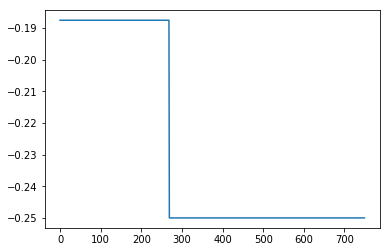

In [51]:
for i in range(37):
    plt.plot(data_14[i,:,1])
    plt.show()

In [52]:
data_14 = preproc.spatialfilter(data_14 ,type='spatialfilter')

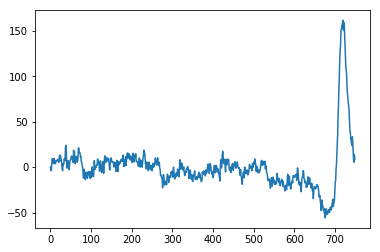

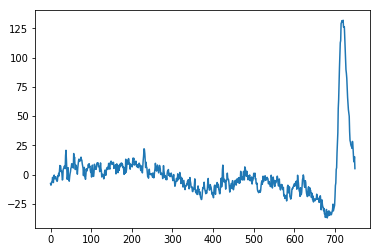

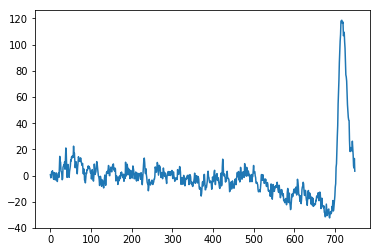

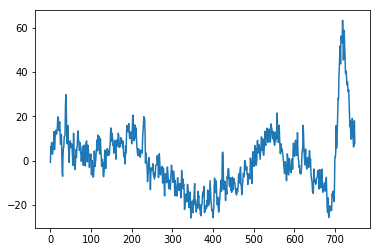

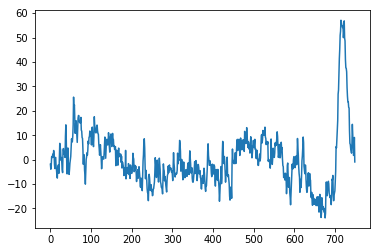

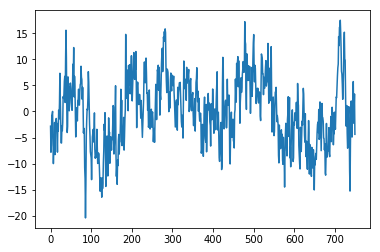

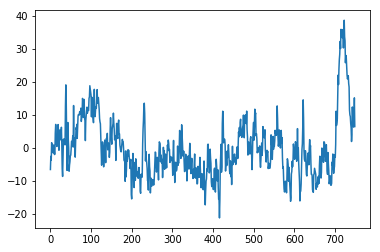

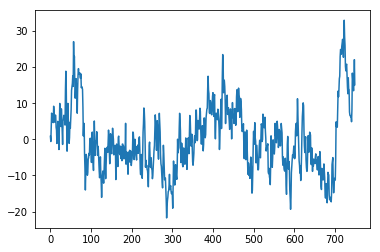

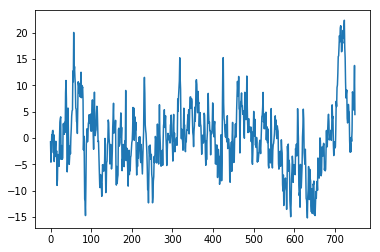

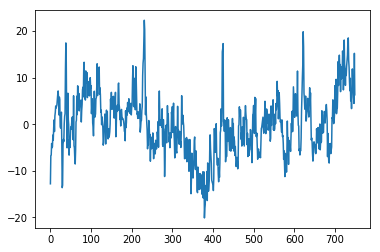

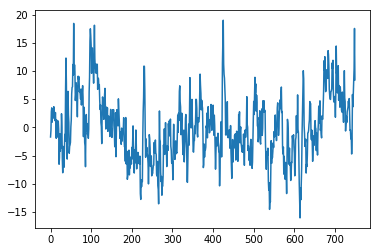

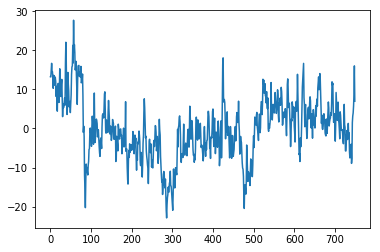

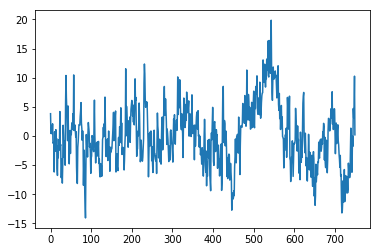

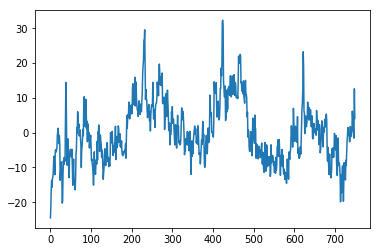

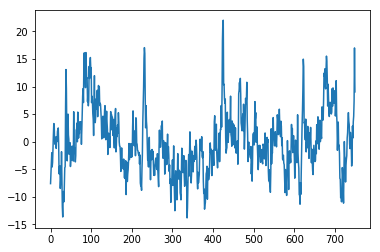

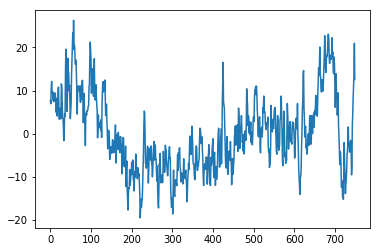

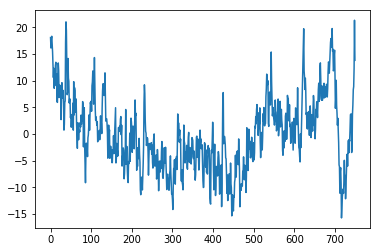

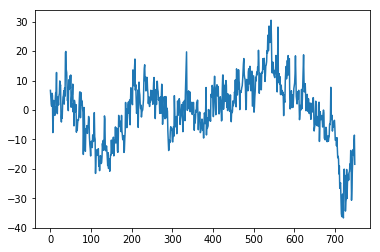

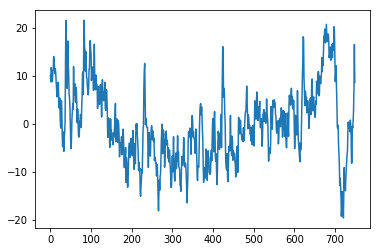

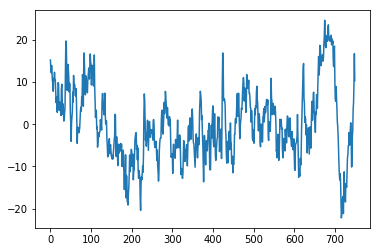

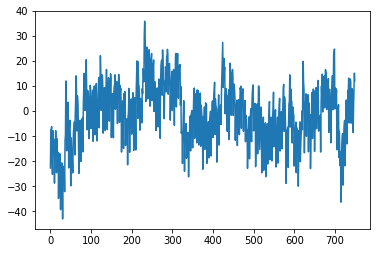

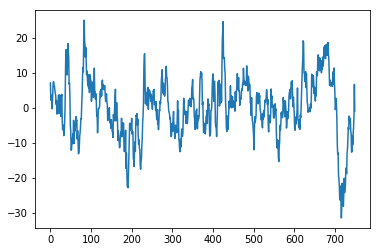

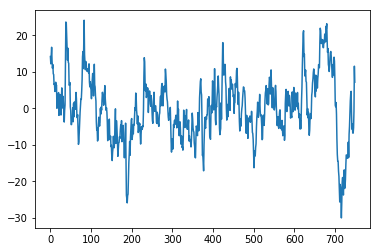

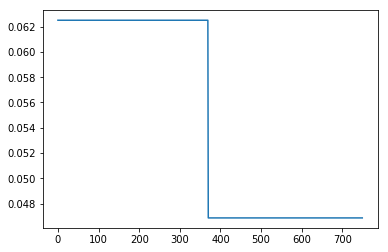

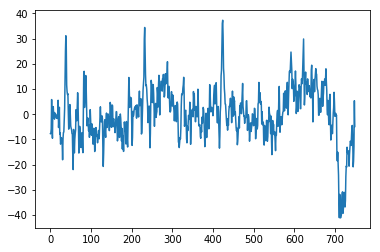

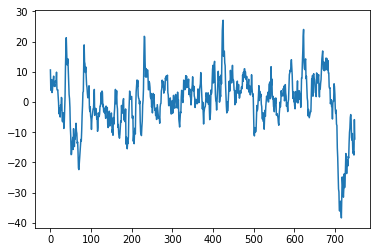

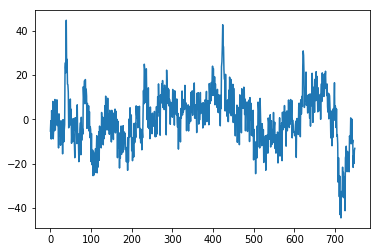

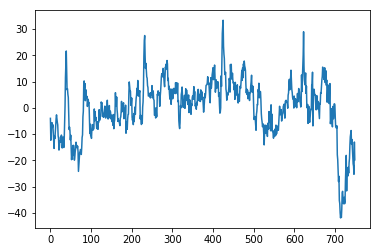

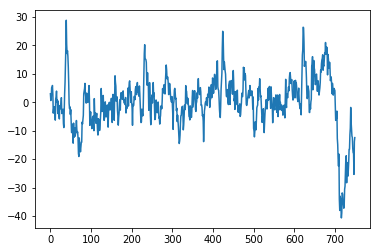

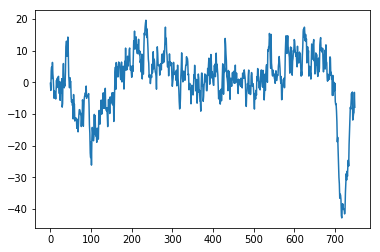

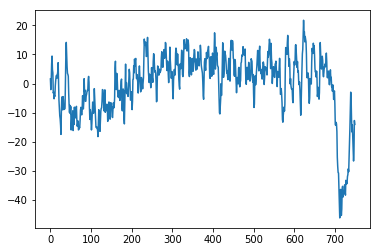

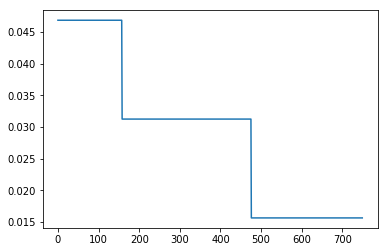

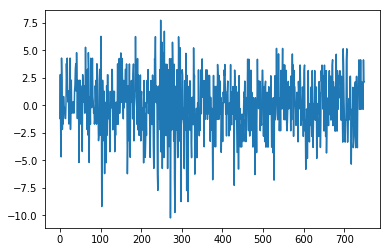

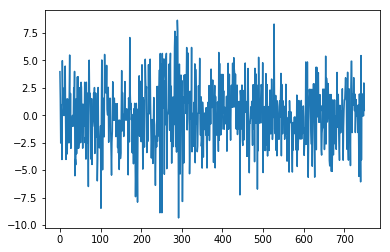

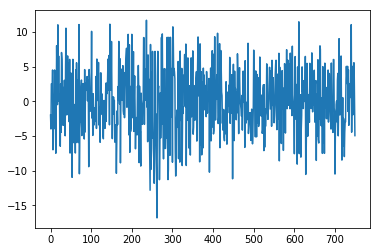

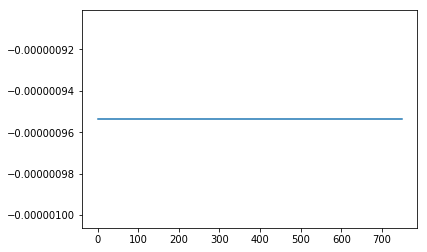

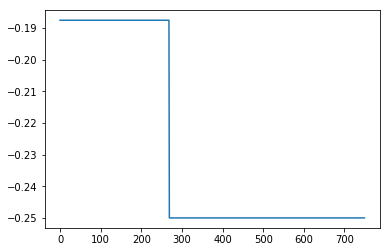

In [53]:
for i in range(37):
    plt.plot(data_14[i,:,1])
    plt.show()

In [54]:
data_14 ,freqs = preproc.powerspectrum(data_14,dim=1,fSample=exp[14]['hdr'].fSample)

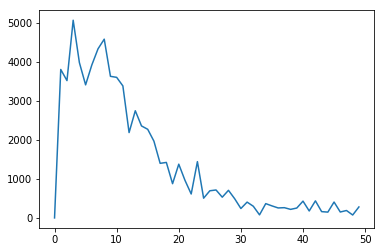

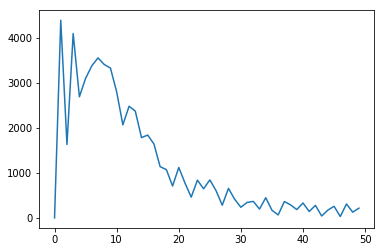

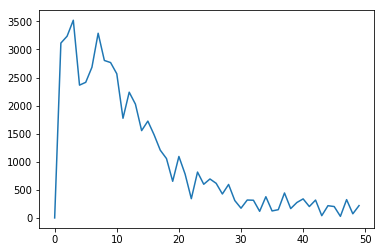

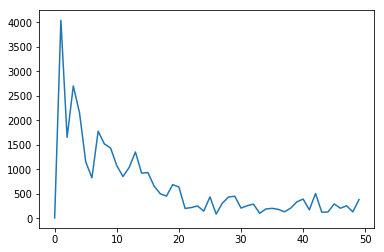

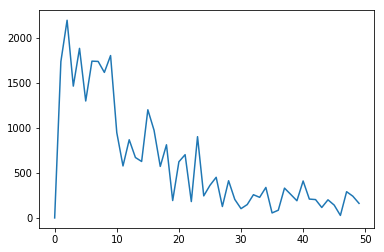

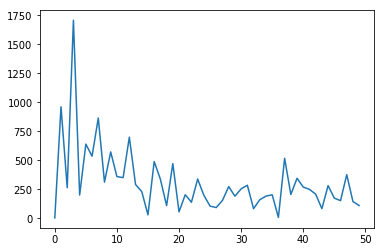

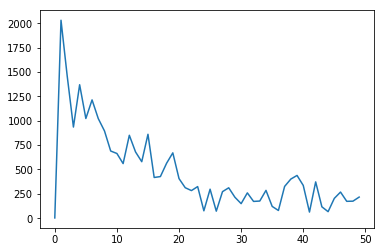

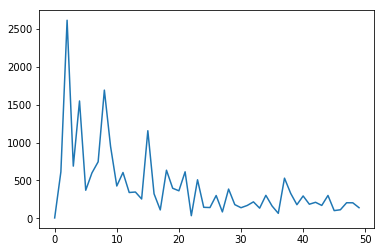

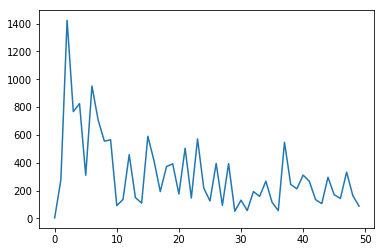

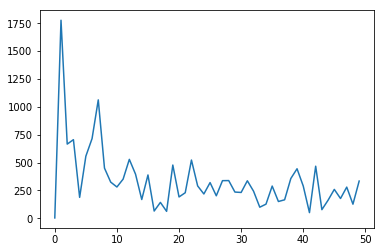

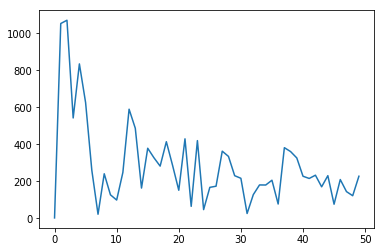

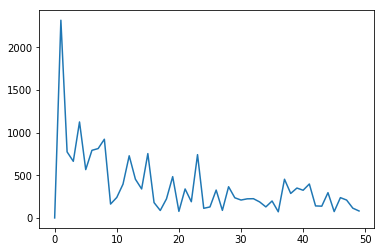

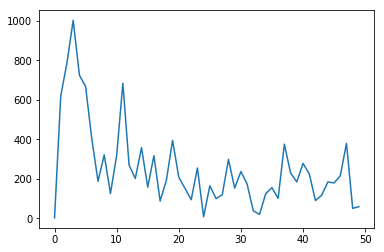

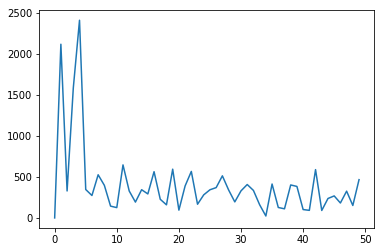

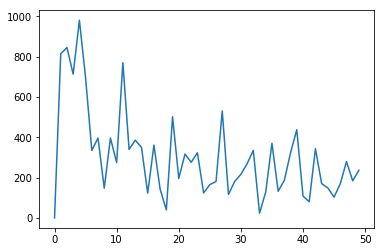

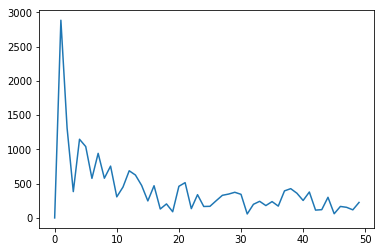

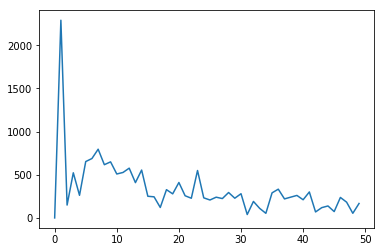

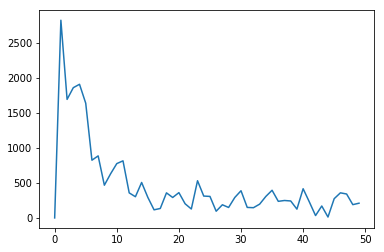

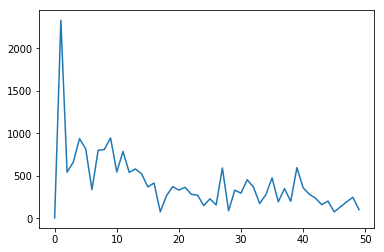

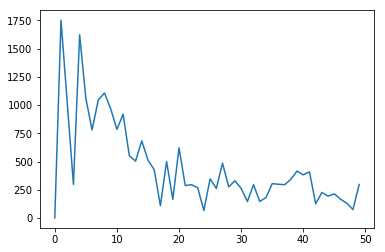

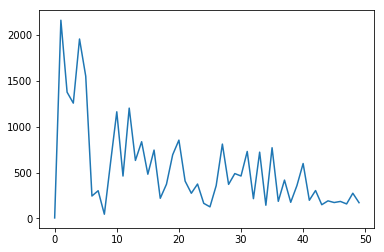

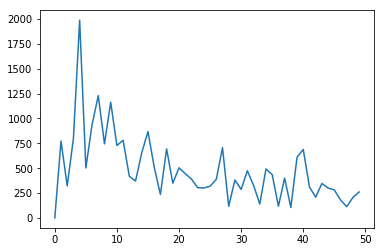

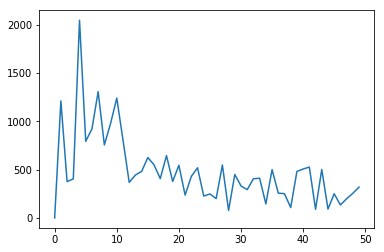

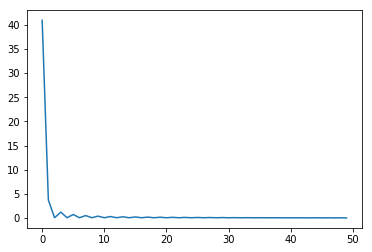

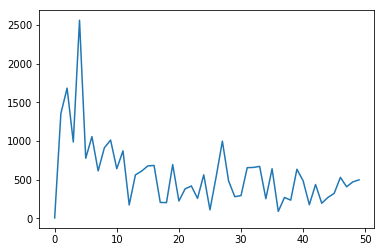

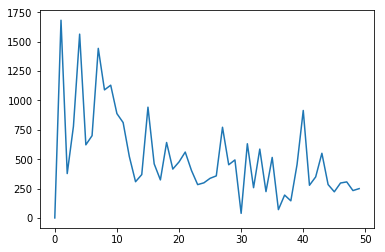

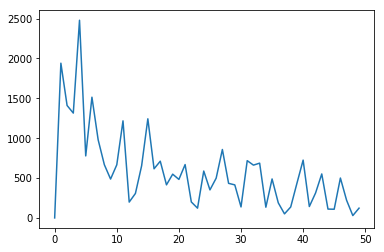

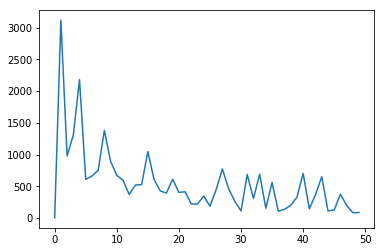

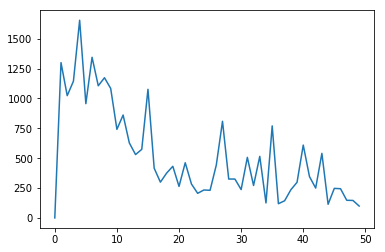

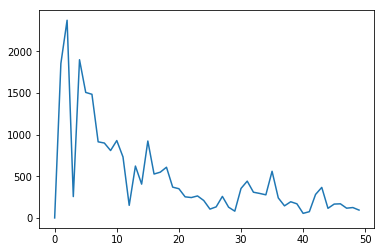

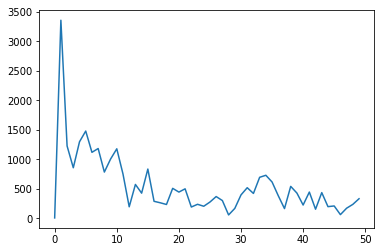

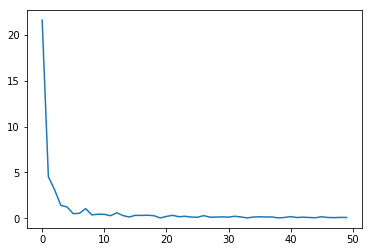

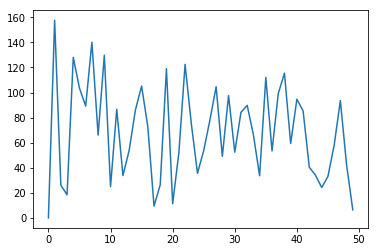

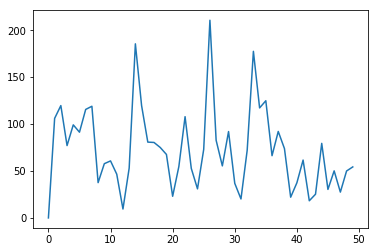

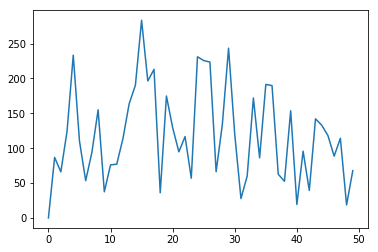

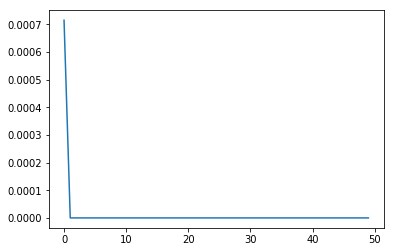

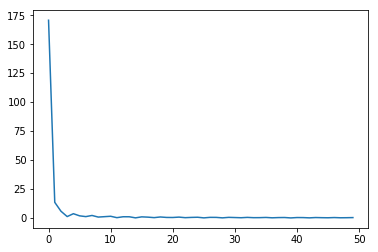

In [55]:
for i in range(37):
    plt.plot(data_14[i,:,1][:50])
    print('')
    plt.show()

-------------------------

In [56]:
left_hand_mov.shape

(84, 37, 375)

In [57]:
right_hand_mov.shape

(84, 37, 375)

In [58]:
both_hands_mov.shape

(84, 37, 375)

In [59]:
%%html
<img src='mobita_32.png', width = 600, height = 600> 

Channels numbers

In [60]:
ch_32_r['C3']

'15'

In [61]:
ch_32_r['Cz']

'16'

In [62]:
ch_32_r['C4']

'17'

                 FP1


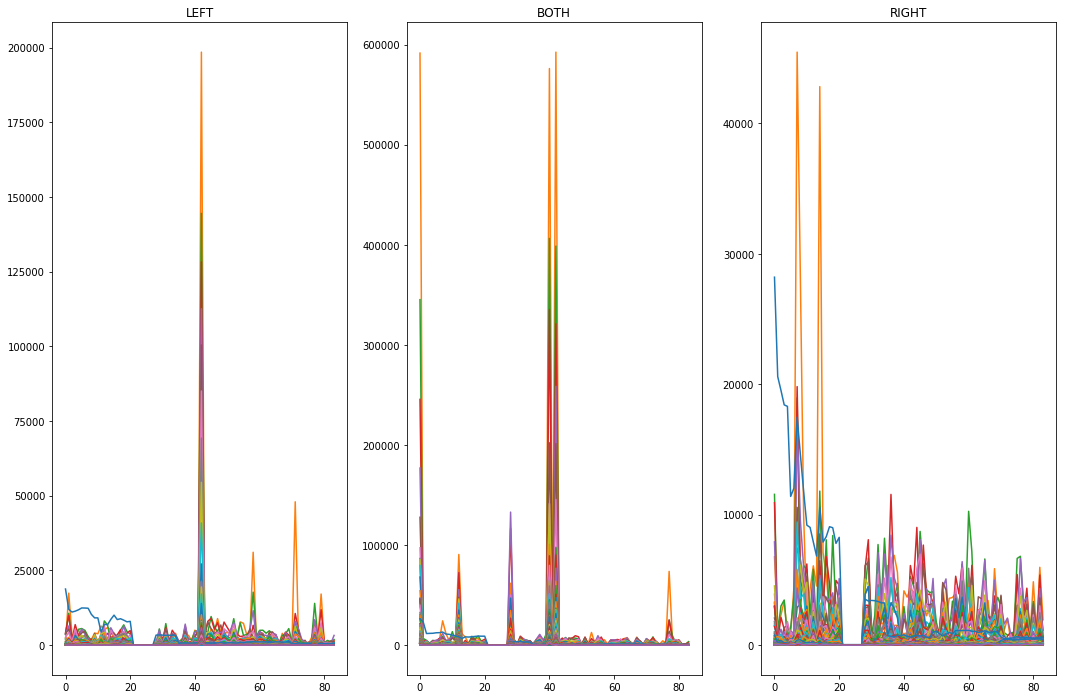

                 FPz


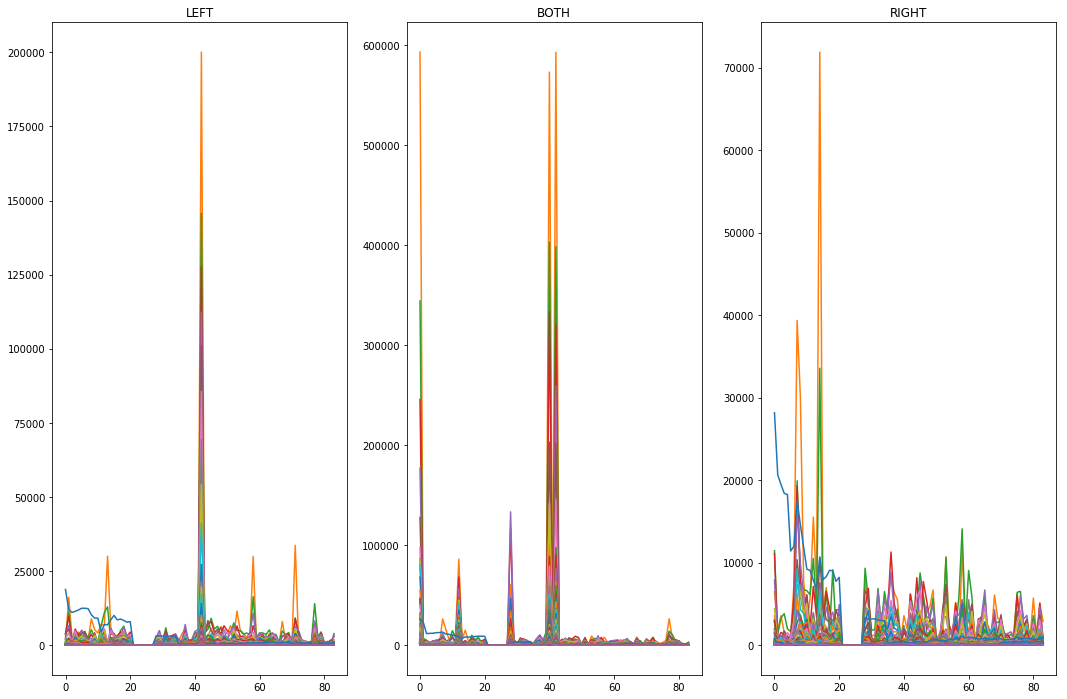

                 FP2


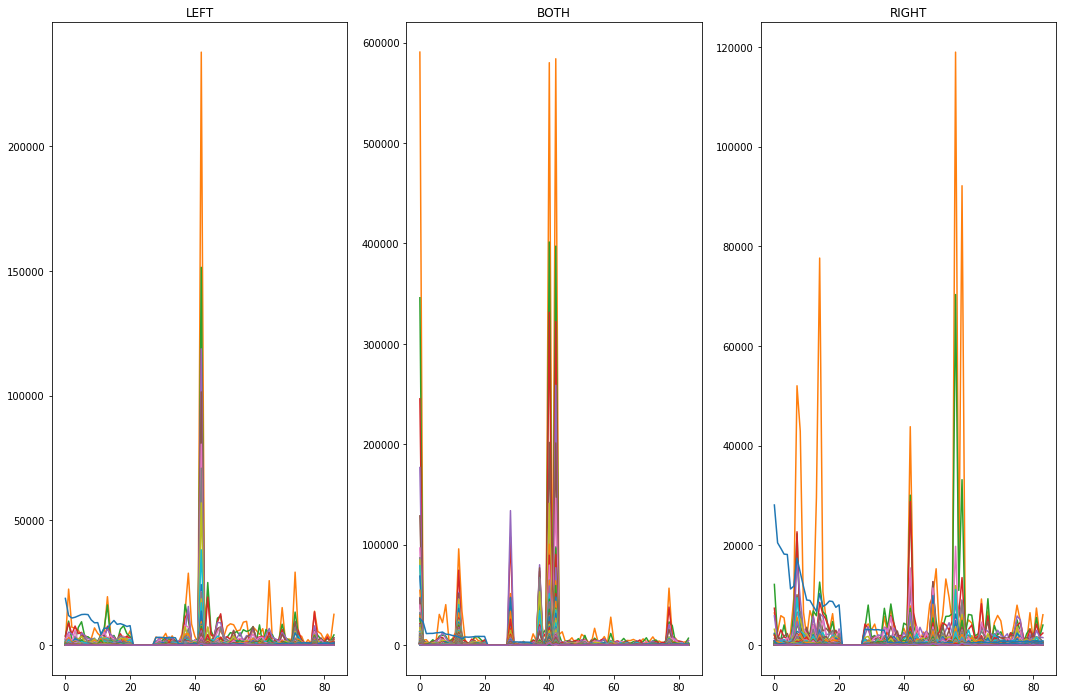

In [73]:
channel = 'C4'

for channel in list(ch_32_r.keys())[:3]:

    print('                 '+channel)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,12))

    ax1.plot(left_hand_mov[:,int(ch_32_r[channel]),:])
    ax1.set_title('LEFT')
    
    
    ax2.plot(both_hands_mov[:,int(ch_32_r[channel]),:])
    ax2.set_title('BOTH')
    
    ax3.plot(right_hand_mov[:,int(ch_32_r[channel]),:])
    ax3.set_title('RIGHT')
    
    plt.show()

In [64]:
for key in ch_32_r.keys():
    print(key)

FP1
FPz
FP2
AF7
AFz
AF8
F3
Fz
F4
FC5
FC1
FC2
FC6
T9
C3
Cz
C4
T10
CP1
CP2
P3
Pz
P4
TP9
P7
POz
O1
Oz
O2
TP10
